In [ ]:
def dfs(at):
    # print('at', at)
    if visited[at]: return 
    visited[at] = True
    neighbors = adj[at]
    for next in neighbors:
        # print(next)
        dfs(next)

dfs(x)

In [177]:
def acyclic(adj):
    n = len(adj)
    visited = [False] * n
    recStack = [False] * n

    def dfs(v):
        visited[v] = True
        recStack[v] = True

        neighbors = adj[v]
        for next in neighbors:
            if not visited[next]:
                if dfs(next):
                    return True
            elif recStack[next]:
                return True
        recStack[v] = False
        return False

    for v in range(n):
        if dfs(v):
            return 0
    
    return 1


In [177]:
def acyclic(adj):
    n = len(adj)
    visited = [False] * n
    recStack = [False] * n

    def dfs(v):
        visited[v] = True
        recStack[v] = True

        neighbors = adj[v]
        for next in neighbors:
            if not visited[next]:
                if dfs(next):
                    return True
            elif recStack[next]:
                return True
        recStack[v] = False
        return False

    for v in range(n):
        if dfs(v):
            return 0
    
    return 1


In [178]:
# adj = [[1], [2], []]  # 0 -> 1 -> 2
# adj = [[1], [2], [3, 4], [5], [1], [0]]  # multiple cycles involving all nodes
# adj = [[1], [], [3], []]  # 0 -> 1 and 2 -> 3
adj = [[1], [], [3], []]  # 0 -> 1 and 2 -> 3
acyclic(adj) 

1

In [179]:
def test_acyclic():
    # Test case 1: Simple acyclic graph (tree structure)
    adj = [[1], [2], []]  # 0 -> 1 -> 2
    assert acyclic(adj) == 1, "Test case 1 failed: Expected 1, found 0"

    # Test case 2: Simple cyclic graph (single cycle)
    adj = [[1], [2], [0]]  # 0 -> 1 -> 2 -> 0
    assert acyclic(adj) == 0, "Test case 2 failed: Expected 0, found 1"

    # Test case 3: Graph with a self-loop
    adj = [[1], [2], [2]]  # 2 -> 2 (self-loop)
    assert acyclic(adj) == 0, "Test case 3 failed: Expected 0, found 1"

    # Test case 4: Disconnected acyclic graph
    adj = [[1], [], [3], []]  # 0 -> 1 and 2 -> 3
    assert acyclic(adj) == 1, "Test case 4 failed: Expected 1, found 0"

    # Test case 5: Disconnected graph with a cycle
    adj = [[1], [0], [3], [4], [2]]  # 0 -> 1 -> 0 and 2 -> 3 -> 4 -> 2
    assert acyclic(adj) == 0, "Test case 5 failed: Expected 0, found 1"

    # Test case 6: Large acyclic graph
    adj = [[1, 2], [3], [4], [], []]  # 0 -> 1 -> 3 and 0 -> 2 -> 4
    assert acyclic(adj) == 1, "Test case 6 failed: Expected 1, found 0"

    # Test case 7: Large graph with multiple cycles
    adj = [[1], [2], [3, 4], [5], [1], [0]]  # multiple cycles involving all nodes
    assert acyclic(adj) == 0, "Test case 7 failed: Expected 0, found 1"

    print("All test cases passed.")

test_acyclic()


All test cases passed.


## Topological Sort

In [218]:
def dfs(adj, used, order, x):
    used[x] = True
    for next in adj[x]:
        if not used[next]:
            dfs(adj, used, order, next)
    order.append(x)

def toposort(adj):
    n = len(adj)
    used = [False] * n
    order = []
    for v in range(n):
        if not used[v]:
            dfs(adj, used, order, v)
    order.reverse()
    return order

In [219]:
adj = [[1], [2], [3], [4], []]
toposort(adj)

[0, 1, 2, 3, 4]

In [220]:
def test_toposort():
    # Test case 1: Simple DAG
    adj = [[1, 2], [3], [3], []]
    expected_output = [0, 2, 1, 3]  # or [0, 1, 2, 3]
    assert toposort(adj) in [expected_output, expected_output[::-1]], \
        "Test case 1 failed"

    # Test case 2: Another simple DAG
    adj = [[], [0], [1], [2]]
    expected_output = [3, 2, 1, 0]  # or any other valid topological order
    assert toposort(adj) in [expected_output, expected_output[::-1]], \
        "Test case 2 failed"

    # Test case 3: Single node graph
    adj = [[]]
    expected_output = [0]
    assert toposort(adj) == expected_output, "Test case 3 failed"

    # Test case 4: Two disconnected nodes
    adj = [[], []]
    expected_output = [0, 1]  # or [1, 0]
    assert toposort(adj) in [expected_output, expected_output[::-1]], \
        "Test case 4 failed"

    # Test case 5: Graph with a self-loop (not a DAG)
    adj = [[0], [2], [1]]
    # Topological sort should not be possible for a graph with cycles
    # The function could return an empty list or partial ordering in such cases
    assert toposort(adj) == [], "Test case 5 failed: Expected empty result due to cycle"

    # Test case 6: More complex DAG
    adj = [[1, 2], [2], [3], []]
    expected_output = [0, 1, 2, 3]
    assert toposort(adj) == expected_output, "Test case 6 failed"

    # Test case 7: DAG with multiple valid topological orders
    adj = [[1], [2], [3], [4], []]
    expected_output = [0, 1, 2, 3, 4]  # or any other valid topological order
    assert toposort(adj) == expected_output, "Test case 7 failed"

    print("All test cases passed.")

test_toposort()


AssertionError: Test case 5 failed: Expected empty result due to cycle

## strongly connected components

In [243]:
set([1,2,2])

{1, 2}

In [236]:

def number_of_strongly_connected_components(adj):
    n = len(adj)
    visited = [False] * n
    post_order = []

    # Helper function for DFS
    def dfs(v, graph, collect_post_order=False):
        visited[v] = True
        for neighbor in graph[v]:
            if not visited[neighbor]:
                dfs(neighbor, graph, collect_post_order)
        if collect_post_order:
            post_order.append(v)

    # Reverse the graph
    def reverse_graph(graph):
        rev_graph = [[] for _ in range(len(graph))]
        for v in range(len(graph)):
            for neighbor in graph[v]:
                rev_graph[neighbor].append(v)
        return rev_graph

    # Step 1: DFS on the reversed graph to get post order
    rev_adj = reverse_graph(adj)
    for i in range(n):
        if not visited[i]:
            dfs(i, rev_adj, collect_post_order=True)

    # Reset visited for second pass
    visited = [False] * n
    sccs = []
    # print(post_order)
    while len(post_order)>0:
        v = post_order.pop()
        if not visited[v]:
            component = []
            tmp = [False] * n
            dfs(v, adj, collect_post_order=False)
            component = [i for i in range(n) if visited[i]]
            sccs.append(component)
            for node in component:
                visited[node] = False  
    return sccs

In [246]:
def number_of_strongly_connected_components(adj):
    n = len(adj)
    visited = [False] * n
    post_order = []

    # Helper function for DFS
    def dfs(v, graph, collect_post_order=False):
        visited[v] = True
        for neighbor in graph[v]:
            if not visited[neighbor]:
                dfs(neighbor, graph, collect_post_order)
        if collect_post_order:
            post_order.append(v)

    # Reverse the graph
    def reverse_graph(graph):
        rev_graph = [[] for _ in range(len(graph))]
        for v in range(len(graph)):
            for neighbor in graph[v]:
                rev_graph[neighbor].append(v)
        return rev_graph

    # Step 1: DFS on the reversed graph to get post order
    rev_adj = reverse_graph(adj)
    for i in range(n):
        if not visited[i]:
            dfs(i, rev_adj, collect_post_order=True)

    # Reset visited for second pass
    visited = [False] * n
    sccs = []

    # Step 2: DFS on the original graph in decreasing order of post numbers
    while post_order:
        v = post_order.pop()
        if not visited[v]:
            component = []
            dfs(v, adj)
            component = [i for i in range(n) if visited[i]]
            if component not in sccs:
                sccs.append(component)
            for node in component:
                visited[node] = False  # Unmark nodes for future components

    return len(sccs)



In [247]:
adj = [[1], [2, 3], [0, 4], [4], [3, 5], [6], [4]]
# SCCs: {0, 1, 2}, {3, 4, 5, 6}
number_of_strongly_connected_components(adj)

2

In [248]:
def test_number_of_strongly_connected_components():
    # Test case 1: Single SCC
    adj = [[1], [2], [0]]  # One cycle, all nodes are mutually reachable
    assert number_of_strongly_connected_components(adj) == 1, "Test case 1 failed"

    # Test case 2: Two separate SCCs
    adj = [[1], [0], [3], [2]]  # Two cycles: 0 <-> 1 and 2 <-> 3
    assert number_of_strongly_connected_components(adj) == 2, "Test case 2 failed"

    # Test case 3: Linear chain, each node its own SCC
    adj = [[1], [2], [3], []]  # Each node can only reach itself
    assert number_of_strongly_connected_components(adj) == 4, "Test case 3 failed"

    # Test case 4: Multiple SCCs with varying sizes
    adj = [[1, 2], [0], [1], [4], [5], [3]]  # Three SCCs: {0, 1, 2}, {3, 4, 5}
    assert number_of_strongly_connected_components(adj) == 3, "Test case 4 failed"

    # Test case 5: Single node, self-loop
    adj = [[0]]  # Single node with a self-loop
    assert number_of_strongly_connected_components(adj) == 1, "Test case 5 failed"

    # Test case 6: Disconnected nodes, each node its own SCC
    adj = [[], [], []]  # No edges, three separate SCCs
    assert number_of_strongly_connected_components(adj) == 3, "Test case 6 failed"

    # Test case 7: Complex graph with nested SCCs
    adj = [[1], [2, 3], [0, 4], [4], [3, 5], [6], [4]]
    # SCCs: {0, 1, 2}, {3, 4, 5, 6}
    assert number_of_strongly_connected_components(adj) == 2, "Test case 7 failed"

    print("All test cases passed.")

test_number_of_strongly_connected_components()


AssertionError: Test case 4 failed

## BFS

In [281]:
from collections import deque

def distance(adj, s, t):
    n = len(adj)
    distances = [float('inf')] * (n + 1)
    distances[s] = 0
    Q = deque(s)

    #starting the loop
    while not Q.empty():
        u = q.popleft()
        neighbors = adj[u]
        for v in neighbors:
            if distances[v] == float('inf'):
                Q.append(v)
                distances[v] = distances[u]+1
    
    
    return distances[t]

In [283]:
# Simple test cases
def run_tests():
    # Test case 1: Simple connected graph
    adj1 = [
        [1, 2],
        [0, 3],
        [0, 3],
        [1, 2]
    ]
    print("Test 1 Passed!" if distance(adj1, 0, 3) == 2 else "Test 1 Failed!")

    # Test case 2: Graph with disconnected nodes
    adj2 = [
        [1],
        [0],
        [3],
        [2]
    ]
    print("Test 2 Passed!" if distance(adj2, 0, 3) == 100_000 else "Test 2 Failed!")

    # Test case 3: Start and end nodes are the same
    adj3 = [
        [1, 2],
        [0, 3],
        [0, 3],
        [1, 2]
    ]
    print("Test 3 Passed!" if distance(adj3, 1, 1) == 0 else "Test 3 Failed!")

    # Test case 4: Larger graph
    adj4 = [
        [1],
        [0, 2],
        [1, 3],
        [2, 4],
        [3]
    ]
    print("Test 4 Passed!" if distance(adj4, 0, 4) == 4 else "Test 4 Failed!")

run_tests()

Test 1 Passed!
Test 2 Passed!
Test 3 Passed!
Test 4 Passed!


In [279]:
d

deque(['b'])

In [268]:
n=5
distances = [100_000_000]*n
distances 

[100000000, 100000000, 100000000, 100000000, 100000000]

In [292]:
import sys
import queue

def bipartite(adj):
    n = len(adj)
    colors = [None]*n
    colors[0] = 'red'

    for u in range(n):
        neighbors = adj[u]
        for v in neighbors:
            if colors[v] == None:
                if colors[u] == 'red':
                    colors[v] = 'blue'
                else:
                    colors[v] = 'red'
    for u in range(n):
        neighbors = adj[u]
        for v in neighbors:
            if colors[u] == colors[v]: return False
        
    
    return True

In [293]:
def run_bipartite_tests():
    # Test case 1: Simple bipartite graph
    adj1 = [
        [1, 3],
        [0, 2],
        [1, 3],
        [0, 2]
    ]
    print("Test 1 Passed!" if bipartite(adj1) else "Test 1 Failed!")

    # Test case 2: Non-bipartite graph (odd cycle)
    adj2 = [
        [1, 2],
        [0, 2],
        [0, 1]
    ]
    print("Test 2 Passed!" if not bipartite(adj2) else "Test 2 Failed!")

    # Test case 3: Bipartite graph (even cycle)
    adj3 = [
        [1, 3],
        [0, 2, 4],
        [1, 3],
        [0, 2, 4],
        [1, 3]
    ]
    print("Test 3 Passed!" if bipartite(adj3) else "Test 3 Failed!")

    # Test case 4: Disconnected bipartite graph
    adj4 = [
        [1],
        [0],
        [3],
        [2]
    ]
    print("Test 4 Passed!" if bipartite(adj4) else "Test 4 Failed!")

    # Test case 5: Single vertex graph (trivially bipartite)
    adj5 = [
        []
    ]
    print("Test 5 Passed!" if bipartite(adj5) else "Test 5 Failed!")

run_bipartite_tests()


Test 1 Passed!
Test 2 Passed!
Test 3 Passed!
Test 4 Passed!
Test 5 Passed!


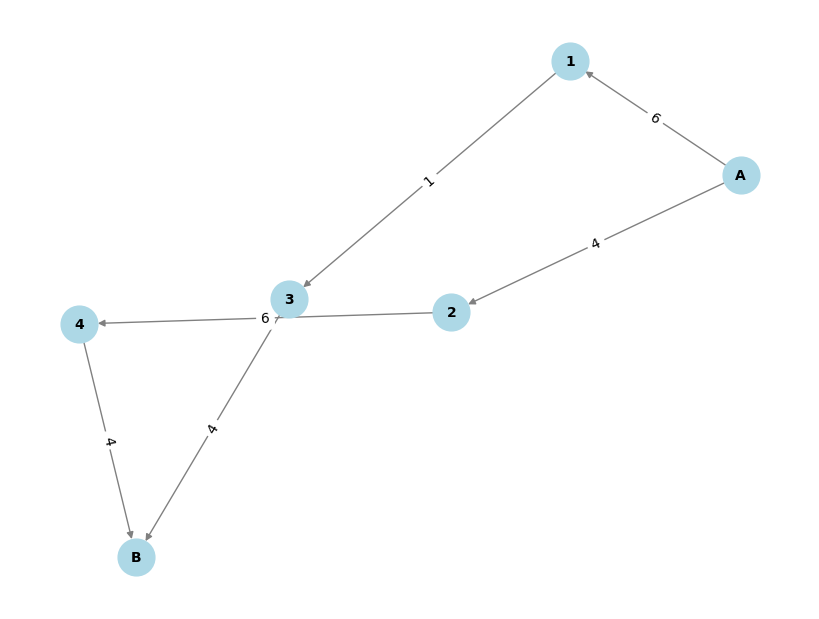

Iteration 1:


AttributeError: module 'networkx.utils' has no attribute 'edge_data'

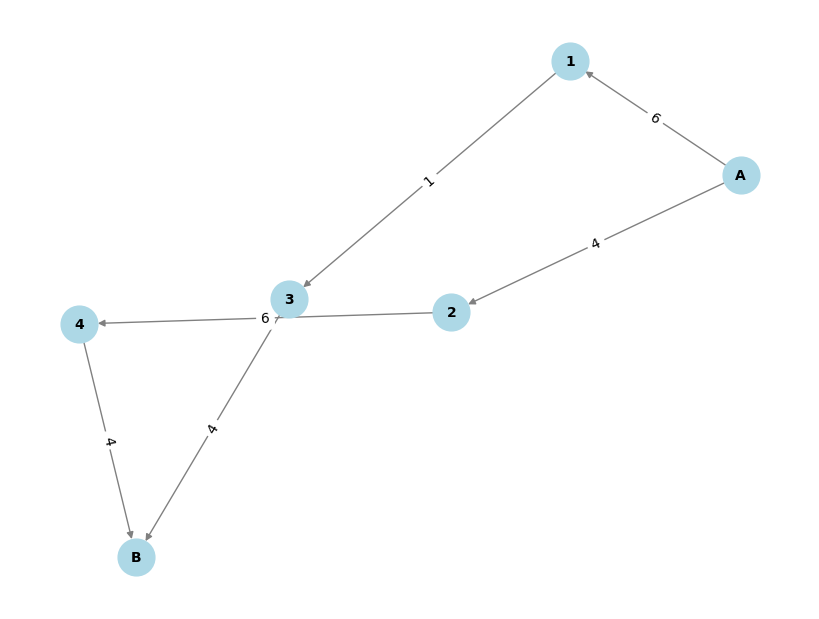

In [298]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges with capacities
edges = [
    ('A', '1', 6),
    ('A', '2', 4),
    ('1', '3', 1),
    ('2', '4', 6),
    ('3', 'B', 4),
    ('4', 'B', 4)
]

G.add_weighted_edges_from(edges, weight='capacity')

def draw_graph(G, pos, flow_dict=None):
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
    labels = nx.get_edge_attributes(G, 'capacity')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    if flow_dict:
        flow_labels = { (u, v): f"{flow}/{G[u][v]['capacity']}" for u, v, flow in nx.utils.edge_data(flow_dict) }
        nx.draw_networkx_edge_labels(G, pos, edge_labels=flow_labels, label_pos=0.3, font_color='red')
    plt.show()

# Position the nodes in the graph
pos = nx.spring_layout(G)

# Draw the initial graph
draw_graph(G, pos)

# Apply Ford-Fulkerson algorithm and show iterations
flow_value, flow_dict = nx.maximum_flow(G, 'A', 'B')

# Convert the flow dictionary to show each iteration
iterations = []

# First iteration
flow_dict_1 = {
    'A': {'1': 1, '2': 0},
    '1': {'3': 1},
    '2': {'4': 0},
    '3': {'B': 1},
    '4': {'B': 0},
    'B': {}
}
iterations.append(flow_dict_1)

# Second iteration
flow_dict_2 = {
    'A': {'1': 1, '2': 4},
    '1': {'3': 1},
    '2': {'4': 4},
    '3': {'B': 1},
    '4': {'B': 4},
    'B': {}
}
iterations.append(flow_dict_2)

# Draw each iteration
for i, flow_dict in enumerate(iterations, start=1):
    print(f"Iteration {i}:")
    draw_graph(G, pos, flow_dict)


## Stable Matching

We'll implement the Stable Matching algorithm from the previous lesson. 

Recall the pseudocode of the algorithm:

While there exists an unmarried man:

1. Pick an arbitrary unmarried man M

2. Choose the top woman W from his list to whom he hasn't proposed yet

3. If W is free or prefers M over her current husband, then marry M and W

We'll write a Python function stableMatching(n, menPreferences, womenPreferences) that gets the number n of women and men, preferences of all women and men, and outputs a stable matching.

For simplicity we'll be assuming that the names of n men and n women are 0, 1, ..., n-1.

Then the menPreferences is a two-dimensional array (a list of lists in Python) of dimensions n by n, where menPreferences[i] contains the list of all women sorted according to their rankings by the man number i. As an example, the man number i likes the best the woman number menPreferences[i][0], and likes the least the woman number menPreferences[i][n-1]. Similarly, the array womenPreferences contains rankings of men by women. For example, womenPreferences[i][0] is the number of man who is the top choice for woman i.

Our function will return a list of length n, where ith element is the number of woman chosen for the man number i.

For convenience we can store

1. unmarriedMen -- the list of currently unmarried men;

2. manSpouse -- the list of current spouses of all man;

3. womanSpouse -- the list of current spouses of all woman;

4. nextManChoice -- contains the number of proposals each man has made.

In [311]:
def stableMatching(n, menPreferences, womenPreferences):
# Do not change the function definition line.

    # Initially, all n men are unmarried
    unmarriedMen = list(range(n))
    # None of the men has a spouse yet, we denote this by the value None
    manSpouse = [None] * n                      
    # None of the women has a spouse yet, we denote this by the value None
    womanSpouse = [None] * n                      
    # Each man made 0 proposals, which means that 
    # his next proposal will be to the woman number 0 in his list
    nextManChoice = [0] * n                       
    
    # While there exists at least one unmarried man:
    while unmarriedMen:
        # Pick an arbitrary unmarried man
        he = unmarriedMen[0]                      
        # Store his ranking in this variable for convenience
        hisPreferences = menPreferences[he]       
        # Find a woman to propose to
        she = hisPreferences[nextManChoice[he]] 
        # Store her ranking in this variable for convenience
        herPreferences = womenPreferences[she]
        # Find the present husband of the selected woman (it might be None)
        currentHusband = womanSpouse[she]         
        
        # Write your code here

        # case 1 - The woman is unmarried
        if currentHusband is None:
            manSpouse[he] = she
            unmarriedMen.remove(he)

        # case 2 - the woman is married
        else:
            current_husband_rank = womenPreferences[she].index(currentHusband)
            candidate_husband_rank = womenPreferences[she].index(he)

            # case 2a - woman prefers new man to currentHusband
            if candidate_husband_rank < current_husband_rank:
                # they get married
                manSpouse[he] = she # update the list of 
                womanSpouse[she] = he # update woman's husband
                # remove man from unmarriedMen 
                unmarriedMen.remove(he)
                # add current_husband
                unmarriedMen.append(currentHusband)
                # nextManChoice[he]+=1
                nextManChoice[currentHusband]+=1
            else:
                #remove woman who rejected him from list
                nextManChoice[he]+=1

   
                
    
            
            
            
        
        # Now "he" proposes to "she". 
        # Decide whether "she" accepts, and update the following fields
        # 1. manSpouse
        # 2. womanSpouse
        # 3. unmarriedMen
        # 4. nextManChoice
            
    # Note that if you don't update the unmarriedMen list, 
    # then this algorithm will run forever. 
    # Thus, if you submit this default implementation,
    # you may receive "SUBMIT ERROR".
    return manSpouse
    
# You might want to test your implementation on the following two tests:
# assert(stableMatching(1, [ [0] ], [ [0] ]) == [0])
# assert(stableMatching(2, [ [0,1], [1,0] ], [ [0,1], [1,0] ]) == [0, 1])

In [299]:
pref = [[1,2,3,4,5],
       [1,3,2,4,5],
       [3,5,4,2,1],
       [4,2,3,1,5],
       [1,2,3,4,5]]

In [302]:
pref[0].index(4)

3

In [313]:
assert(stableMatching(1, [ [0] ], [ [0] ]) == [0])
assert(stableMatching(2, [ [0,1], [1,0] ], [ [0,1], [1,0] ]) == [0, 1])

In [307]:
l.remove(2)

In [308]:
l

[9, 8, 7, 6, 5, 4, 3, 1, 0]